# Genere Analysis Looking into
- differentiators between songs in different genres
- popular vs not popular in genre

In [40]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [41]:
# Load in the merged data
streaming_df = pd.read_csv('/Users/joseflemker/Documents/GitHub/3250-data-analytics-template/data/finished/merged_data_finished.csv', encoding='utf-8')

Because there are so many genres we need to generalize them into groups
Rock, Metal, Indie/Alternative, Hip Hop/Rap, Pop, R&B

One thing to note is that some songs belong to more than one group so it is sorted in a way that songs get assigned by the first match in the iteration. I have ordered them in a way that makes sense to me corresponnding with research on most popular genres. This is just something to note with the analysis.

In [55]:
# Define new genre groups
genre_mapping = {
    'Pop': ['pop'],
    'Hip Hop/Rap': ['hip hop', 'rap'],
    'Rock': ['rock'],
    'Indie/Alternative': ['indie', 'alternative', 'alt'],
    'R&B': ['r&b'],
    'Folk': ['folk'],
    'Reggae': ['reggae'],
    'Dance': ['dance', 'edm', 'electro', 'house'],
    'Instrumental': ['lo-fi', 'instrumental', 'ambient'],
}

In [56]:
# Now actually i8terate through and add the new column
def map_genre(genre):
    for group, keywords in genre_mapping.items():
        if any(keyword in genre.lower() for keyword in keywords):
            return group
    return 'Other'  # Default category for unmatched genres

# Apply the mapping function to create a new column
streaming_df['genre_group'] = streaming_df['genre'].apply(map_genre)

In [57]:
# Explore average total and daily streams on a per genre basis
# Gather top 5 genres with the most songs in dfand calculate average total streams
top_track_genres = streaming_df.groupby('genre_group').agg(
        total_streams_avg = ('total_streams', 'mean'),
        danceability_avg=('danceability', 'mean'),
        energy_avg=('energy', 'mean'),
        liveness_avg=('liveness', 'mean'),
        valence_avg=('valence', 'mean'),
        speechiness_avg=('speechiness', 'mean'),
        acousticness_avg=('acousticness', 'mean'),
        instrumentalness_avg=('instrumentalness', 'mean'),
        loudness_avg=('loudness', 'mean'),
        mode_avg=('mode', 'mean'),
        tempo_avg=('tempo', 'mean'),
        duration_ms_avg=('duration_ms', 'mean'),
        song_count=('track_name', 'count')
    ).reset_index()

In [58]:
# Remove genreless data
top_track_genres = top_track_genres[top_track_genres['genre_group'] != 'Other']

In [59]:
top_track_genres

,genre_group,total_streams_avg,danceability_avg,energy_avg,liveness_avg,valence_avg,speechiness_avg,acousticness_avg,instrumentalness_avg,loudness_avg,mode_avg,tempo_avg,duration_ms_avg,song_count
0,Dance,1.165462e+09,0.642500,0.709812,0.207500,0.422156,0.083700,0.186932,0.057573,-5.019563,0.375000,121.637687,191349.937500,16
1,Hip Hop/Rap,1.333504e+09,0.707725,0.601059,0.199980,0.470925,0.140016,0.198349,0.001552,-6.309373,0.588235,118.032039,218058.686275,51
2,Indie/Alternative,9.999586e+08,0.574650,0.629483,0.196678,0.390610,0.067627,0.301725,0.016214,-6.927275,0.700000,124.489775,208286.400000,40
3,Instrumental,1.004913e+09,0.590000,0.229000,0.294733,0.198667,0.068800,0.839667,0.017333,-15.399667,0.666667,121.332667,183065.666667,3
5,Pop,1.243329e+09,0.631722,0.618359,0.160436,0.489338,0.061811,0.279580,0.028439,-6.485838,0.595960,119.267035,204945.393939,198
6,R&B,1.917722e+09,0.633154,0.664923,0.129685,0.411692,0.072692,0.103895,0.001218,-5.581462,0.461538,125.567846,241371.923077,13
7,Rock,1.292980e+09,0.573000,0.710426,0.186772,0.511957,0.048694,0.125014,0.014634,-6.528447,0.659574,116.470702,237982.106383,47


In [61]:
# Define the features and genres
categories = ['Danceability', 'Energy', 'Valence', 'Instrumentalness']
genres_data = {
    'Dance': top_track_genres[top_track_genres['genre_group'] == 'Dance'][categories].values.flatten(),
    'Hip Hop/Rap': top_track_genres[top_track_genres['genre_group'] == 'Hip Hop/Rap'][categories].values.flatten(),
    'Indie/Alternative': top_track_genres[top_track_genres['genre_group'] == 'Indie/Alternative'][categories].values.flatten(),
    'Instrumental': top_track_genres[top_track_genres['genre_group'] == 'Instrumental'][categories].values.flatten(),
    'Pop': top_track_genres[top_track_genres['genre_group'] == 'Pop'][categories].values.flatten(),
    'R&B': top_track_genres[top_track_genres['genre_group'] == 'R&B'][categories].values.flatten(),
    'Rock': top_track_genres[top_track_genres['genre_group'] == 'Rock'][categories].values.flatten(),
}

# Create radar chart
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for genre, values in genres_data.items():
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, label=genre)

ax.set_yticklabels([])  # Remove y-axis labels for clarity
ax.set_xticks(angles)
ax.set_xticklabels(categories)

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Audio Feature Comparison Across Genres')
plt.show()

KeyError: "None of [Index(['Danceability', 'Energy', 'Valence', 'Instrumentalness'], dtype='object')] are in the [columns]"

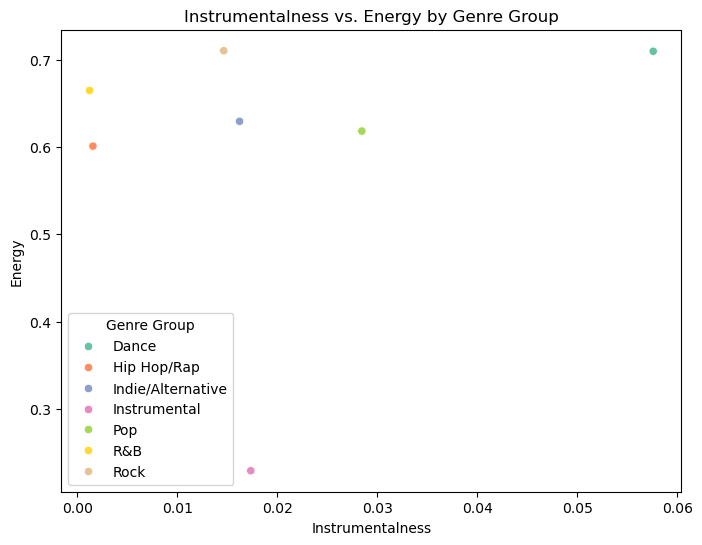

In [62]:
# Scatter plot of instrumentalness vs. energy, color-coded by genre_group
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_track_genres, x='instrumentalness_avg', y='energy_avg', hue='genre_group', palette='Set2')
plt.title('Instrumentalness vs. Energy by Genre Group')
plt.xlabel('Instrumentalness')
plt.ylabel('Energy')
plt.legend(title='Genre Group')
plt.show()

/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_8693/1566189514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=streaming_df, x='genre_group', y=feature, ax=ax, palette='Set2')
/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_8693/1566189514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=streaming_df, x='genre_group', y=feature, ax=ax, palette='Set2')
/var/folders/cn/ktnh7mkx07l6n4lyfl088tth0000gn/T/ipykernel_8693/1566189514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=streaming_df, x='genr

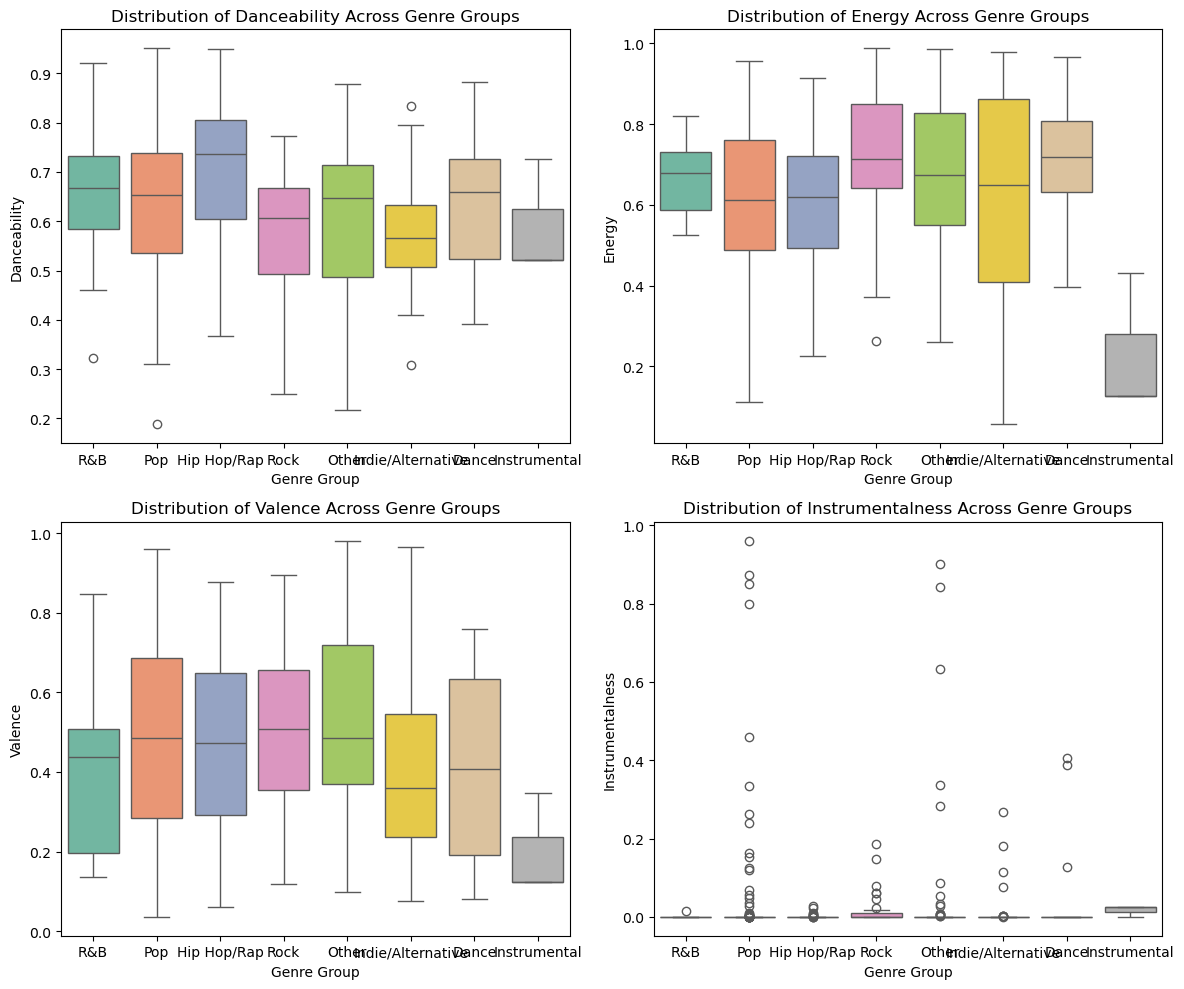

In [66]:
# Set up a grid of plots for multiple features
features = ['danceability', 'energy', 'valence', 'instrumentalness']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    sns.boxplot(data=streaming_df, x='genre_group', y=feature, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {feature.replace("_avg", "").title()} Across Genre Groups')
    ax.set_xlabel('Genre Group')
    ax.set_ylabel(feature.replace("_avg", "").title())

plt.tight_layout()
plt.show()